In [69]:
import pandas as pd
import numpy as np

In [70]:
loc_df = pd.read_csv('location_data.csv')

In [71]:
loc_df.head()

,price,ID,address
0,465000,7513227,544 Velore Road Denison Vic 3858
1,1220000,7720571,1375 Ballan Road Quandong Vic 3030
2,560000,104997043,1/76 Scotsburn Avenue Clayton Vic 3168
3,385000,105023594,47 Lee Street Deer Park Vic 3023
4,500000,105140240,15 Fiddian Court Altona Meadows Vic 3028


In [72]:

def non_repeating_random(low, high, size):
    """
    Generates an array of non-repeating random integers within a given range.

    Args:
        low (int): The lowest integer value in the range.
        high (int): The highest integer value in the range (exclusive).
        size (int): The number of random integers to generate.

    Returns:
        numpy.ndarray: An array of non-repeating random integers.
                       Returns an empty array if size is greater than the range.
    """
    if size > (high - low):
        return np.array([])
    return np.random.choice(np.arange(low, high), size=size, replace=False)

In [73]:
data = loc_df['price']
# Remove outliers using the IQR method
q25, q75 = np.percentile(data, [25, 75])
iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
cleaned_df = loc_df[(lower_bound <= loc_df.price) & (loc_df.price <= upper_bound)]
cleaned_df = cleaned_df.iloc[non_repeating_random(0,cleaned_df.shape[0],4000)]

In [74]:
cleaned_df

,price,ID,address
26642,450000,117573983,1 Di Berardino Way Hillside Vic 3037
27041,1165000,117626391,24 Blue Hills Avenue Mount Waverley Vic 3149
43403,640000,119701891,9 Marks Avenue Heidelberg Heights Vic 3081
27576,800000,117696283,9 Darcy Avenue Sandringham Vic 3191
31563,716888,118194579,637 Springvale Road Vermont South Vic 3133
...,...,...,...
35136,290000,118673859,707b/1 - 19 Colombo Street Mitcham Vic 3132
25232,335000,117384095,60 Allenby Road Hillside Vic 3037
9745,840000,114837283,24 Yorkshire Street Blackburn North Vic 3130
45184,610000,119902113,57 Landscape Drive Hillside Vic 3037


In [75]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="geocoding_example")

def coord_guess(geolocator,address):
    try:
        location = geolocator.geocode(address)
        if location:
            latitude = location.latitude
            longitude = location.longitude
            return [latitude, longitude]
        else:
            return [None,None]
    except Exception as e:
        return [None,None]

In [76]:
geolocator = Nominatim(user_agent="geocoding_app")
locations = cleaned_df['address'].apply(lambda x: coord_guess(geolocator,x))

In [77]:
len(locations)

4000

In [78]:
cleaned_df['lat'] = [x[0] for x in locations]
cleaned_df['lon'] = [x[1] for x in locations]

In [79]:
cleaned_df.head()

,price,ID,address,lat,lon
26642,450000,117573983,1 Di Berardino Way Hillside Vic 3037,-37.704269,144.754463
27041,1165000,117626391,24 Blue Hills Avenue Mount Waverley Vic 3149,NaN,NaN
43403,640000,119701891,9 Marks Avenue Heidelberg Heights Vic 3081,-37.735790,145.051791
27576,800000,117696283,9 Darcy Avenue Sandringham Vic 3191,NaN,NaN
31563,716888,118194579,637 Springvale Road Vermont South Vic 3133,-37.859395,145.169355


In [80]:
cleaned_df[cleaned_df.isnull().any(axis=1)].shape[0]

1688

In [81]:
cleaned_df = cleaned_df.dropna()

In [82]:
cleaned_df.head()

,price,ID,address,lat,lon
26642,450000,117573983,1 Di Berardino Way Hillside Vic 3037,-37.704269,144.754463
43403,640000,119701891,9 Marks Avenue Heidelberg Heights Vic 3081,-37.735790,145.051791
31563,716888,118194579,637 Springvale Road Vermont South Vic 3133,-37.859395,145.169355
46845,780000,120097989,46 Cappella Court Glen Waverley Vic 3150,-37.895732,145.168422
14486,326000,115556499,8/30 Kemp Street Thornbury Vic 3071,-37.762048,144.994914


In [83]:
data = cleaned_df['lat']
# Remove outliers using the IQR method
q25, q75 = np.percentile(data, [25, 75])
iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
cleaned_df = cleaned_df[(lower_bound <= cleaned_df.lat) & (cleaned_df.lat <= upper_bound)]

In [84]:
data = cleaned_df['lon']
# Remove outliers using the IQR method
q25, q75 = np.percentile(data, [25, 75])
iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
cleaned_df = cleaned_df[(lower_bound <= cleaned_df.lon) & (cleaned_df.lon <= upper_bound)]

In [85]:
cleaned_df.head()

,price,ID,address,lat,lon
26642,450000,117573983,1 Di Berardino Way Hillside Vic 3037,-37.704269,144.754463
43403,640000,119701891,9 Marks Avenue Heidelberg Heights Vic 3081,-37.735790,145.051791
31563,716888,118194579,637 Springvale Road Vermont South Vic 3133,-37.859395,145.169355
46845,780000,120097989,46 Cappella Court Glen Waverley Vic 3150,-37.895732,145.168422
14486,326000,115556499,8/30 Kemp Street Thornbury Vic 3071,-37.762048,144.994914


In [87]:
cleaned_df.to_csv('coordinate_data.csv')

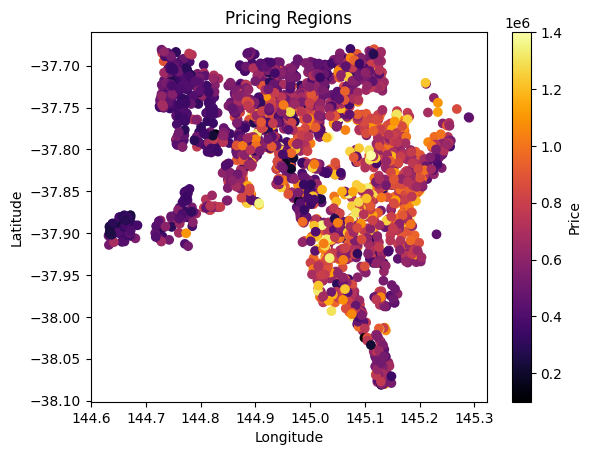

In [86]:
import matplotlib.pyplot as plt
import numpy as np


# Create scatter plot
#plt.figure(figsize=(8, 6))
scatter = plt.scatter(cleaned_df['lon'], cleaned_df['lat'], c=cleaned_df['price'], cmap='inferno')  # You can change 'viridis' to other colormaps

# Add color bar
plt.colorbar(scatter, label='Price')

# Add labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pricing Regions')

plt.show()


In [89]:
coord_df = pd.read_csv('coordinate_data.csv')

In [91]:
coord_df.head()

,Unnamed: 0,price,ID,address,lat,lon
0,26642,450000,117573983,1 Di Berardino Way Hillside Vic 3037,-37.704269,144.754463
1,43403,640000,119701891,9 Marks Avenue Heidelberg Heights Vic 3081,-37.735790,145.051791
2,31563,716888,118194579,637 Springvale Road Vermont South Vic 3133,-37.859395,145.169355
3,46845,780000,120097989,46 Cappella Court Glen Waverley Vic 3150,-37.895732,145.168422
4,14486,326000,115556499,8/30 Kemp Street Thornbury Vic 3071,-37.762048,144.994914


In [108]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Example: Create some sample data
X = coord_df[['lon','lat']]
y = coord_df['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': range(5,100,5),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # p=1: Manhattan distance, p=2: Euclidean distance
}

# Grid Search with 5-fold Cross Validation
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Run Grid Search
grid_search.fit(X_train, y_train)

# Best model
best_knn = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

# Predict on test set
y_pred = best_knn.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Fitting 5 folds for each of 76 candidates, totalling 380 fits
Best Hyperparameters: {'n_neighbors': 40, 'p': 1, 'weights': 'distance'}
Mean Absolute Error (MAE): 156377.88
Root Mean Squared Error (RMSE): 211185.58
R² Score: 0.28


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0],
}

# Grid Search with 5-fold Cross Validation
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # because lower MSE is better
    n_jobs=-1,  # use all CPUs
    verbose=2
)

# Run Grid Search
grid_search.fit(X_train, y_train)

# Best model
best_gbr = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

# Predict on test set
y_pred = best_gbr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Mean Absolute Error (MAE): 161478.57
Root Mean Squared Error (RMSE): 210865.58
R² Score: 0.28


c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


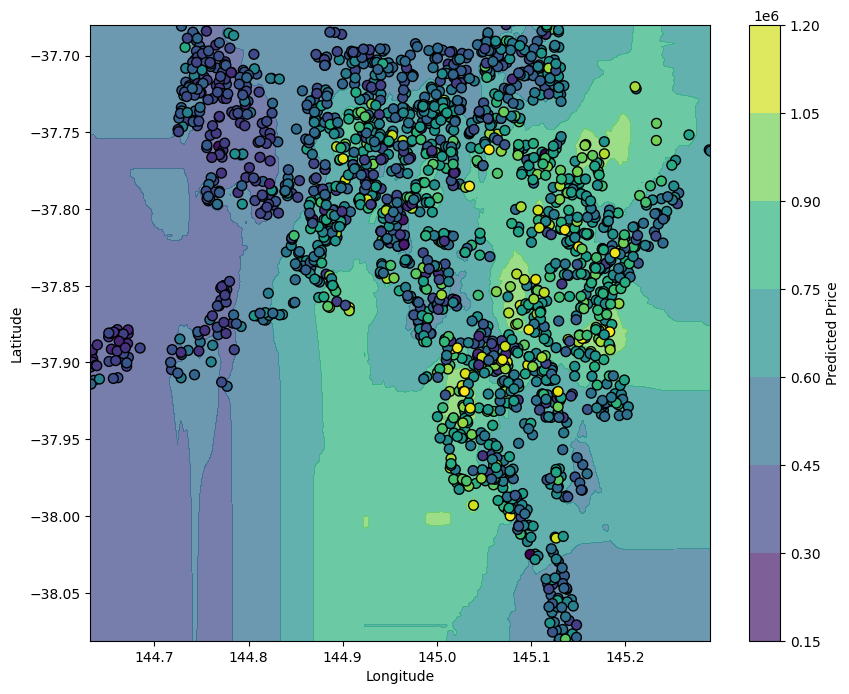

In [125]:
# 4. Create a dense grid of points for visualization
x_min, x_max = X.iloc[:, 0].min(), X.iloc[:, 0].max() 
y_min, y_max = X.iloc[:, 1].min() , X.iloc[:, 1].max() 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid_points = np.c_[xx.ravel(), yy.ravel()]

# 5. Predict on the grid
Z = best_knn.predict(grid_points)
Z = Z.reshape(xx.shape)

# 6. Plot
plt.figure(figsize=(10, 8))
# Show the predicted surface
contour = plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.7)
plt.colorbar(contour, label='Predicted Price')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# Scatter real training points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor='k', cmap='viridis', s=50, label='Training Points')

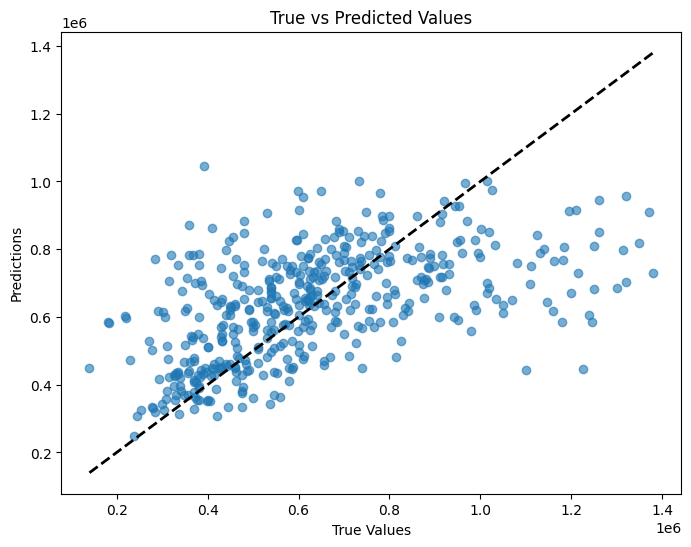

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


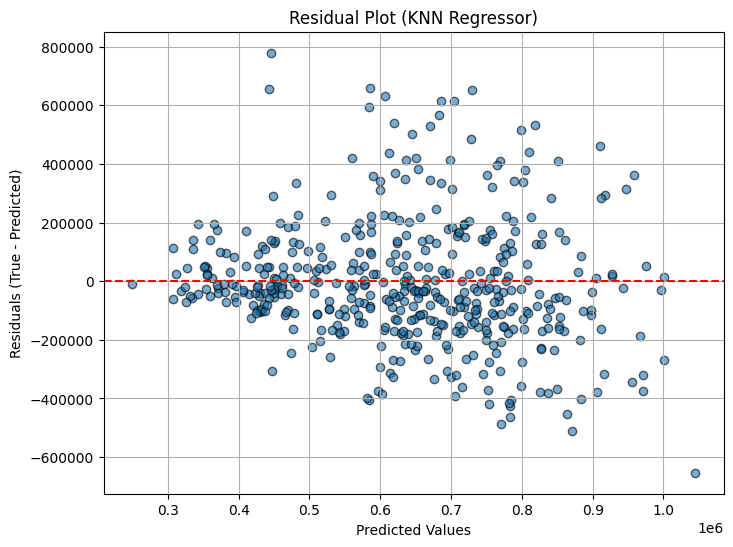

In [ ]:
residuals = y_test - y_pred
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')  # horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of House Prices')
plt.grid(True)
plt.show()
